In [1]:
import config
from config import *
from utils import *
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2

import imageio as io
import albumentations as A
from albumentations.pytorch import ToTensorV2

from pred import load_model, predict_batch, pred_whole_image

In [2]:
info_map = idp.jsonfile.read_json(r"Z:\hwang_Pro\data\2022_tanashi_broccoli\12_head_segment\broccoli_autumn21-20220405_0.json")

In [3]:
one_img_json = info_map['2_DJI_0355']
one_img_json.keys()

dict_keys(['rawImagePath', 'cropedImagePath', 'cropLeftTopCorner', 'gridCoordOnCroppedImage', 'headCoordOnRawImage', 'headCoordOnCroppedImage'])

In [4]:
model = load_model()

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
initilizing network


100%|██████████| 10/10 [00:00<00:00, 16.68it/s]


initilization done


In [5]:
out, whole_mask = pred_whole_image(
    img_path = one_img_json['cropedImagePath'],
    coords   = one_img_json['headCoordOnCroppedImage'],
    model    = model
)

c:\ProgramData\Miniconda3\envs\uav_test\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [6]:
len(out)

22

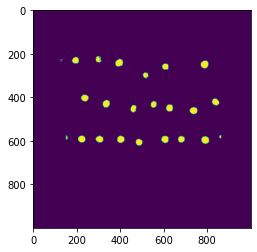

In [7]:
plt.imshow(whole_mask)

In [8]:
np.unique(whole_mask)

array([  0, 255], dtype=uint8)

In [12]:
coords = np.asarray(one_img_json['headCoordOnCroppedImage'])

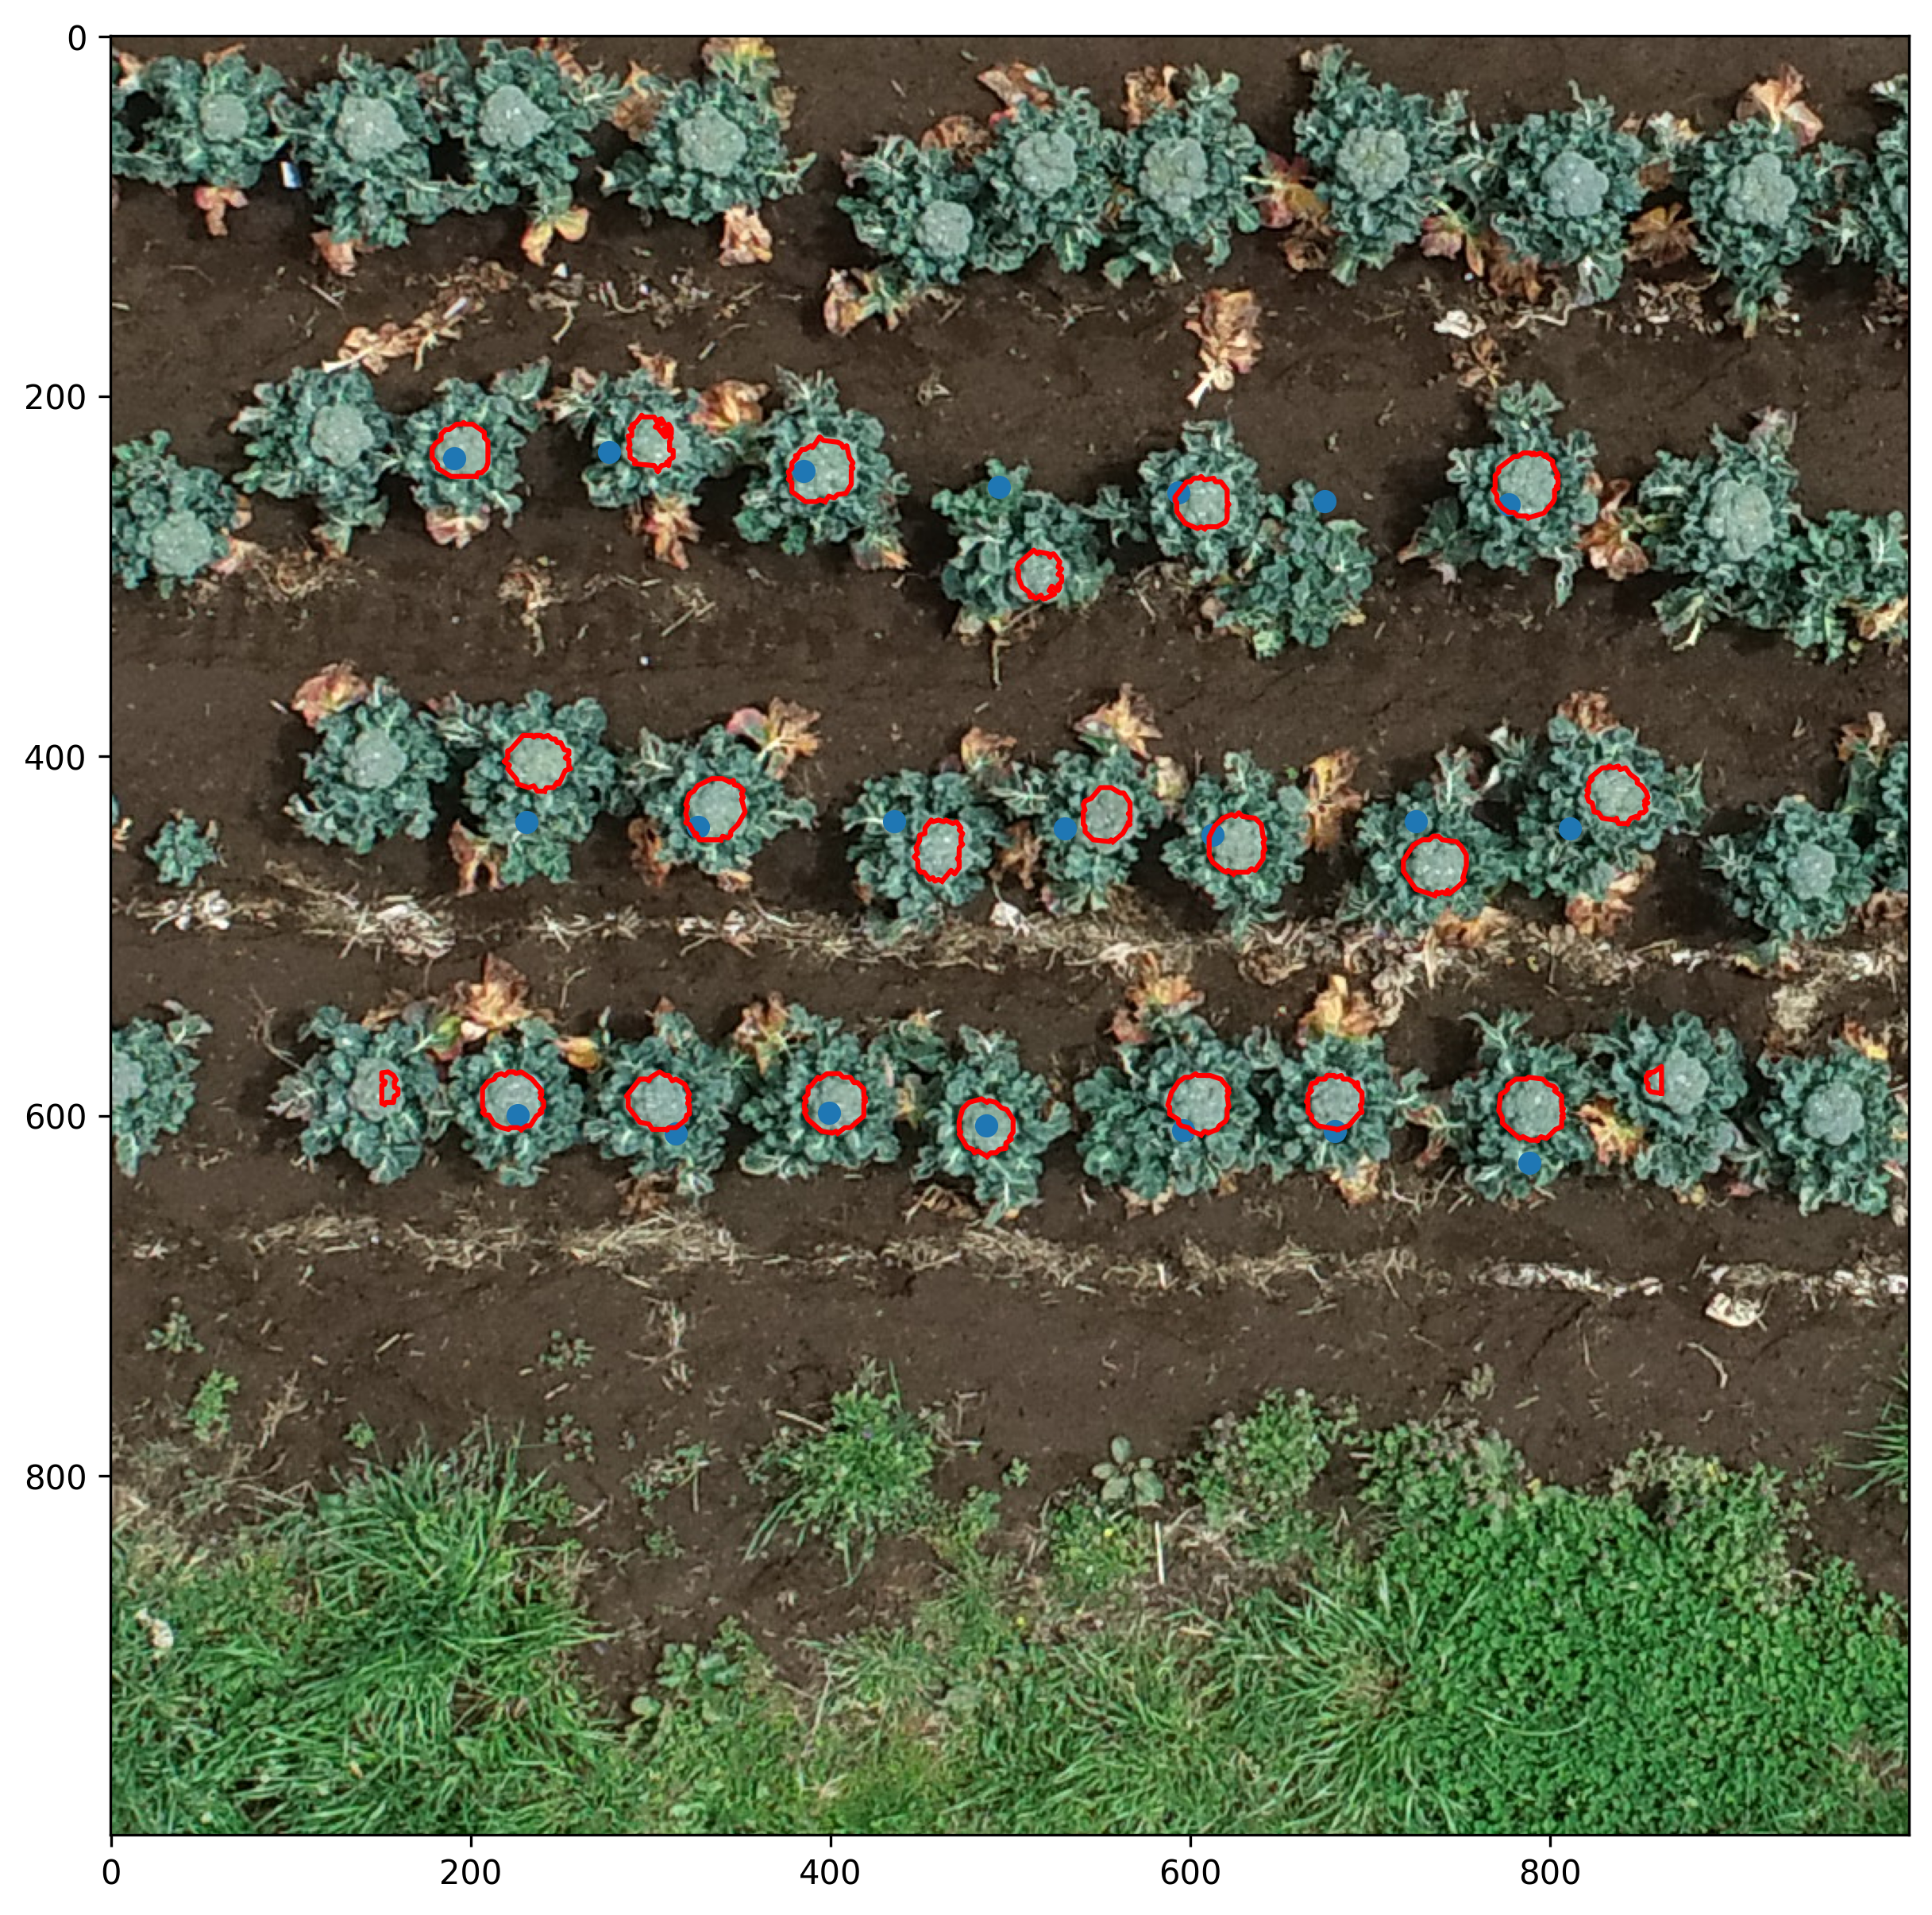

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,10), dpi=300)

img = plt.imread(one_img_json['cropedImagePath'])
ax.imshow(img)

ax.scatter(*coords.T)

for o in out:
    o = np.asarray(o)
    ax.plot(*o.T, 'r-')

In [14]:
from utils.tolabelme import save_lbme_json

In [15]:
project_name = '20220405'
croped_image_name = '2_DJI_0355'

In [16]:
out_json_path = f'{project_data_folder}/{working_spacename}/annotations/tbd/{croped_image_name}.json'

In [17]:
save_lbme_json(one_img_json['cropedImagePath'], out, out_json_path)